# For fig 3.1.2 in the book

## Step1: Loading the packages we need

In [1]:
import urllib
import zipfile
import urllib.request
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Step2: Downloading zip data from the Internet with the package urllib.request

In [2]:
urllib.request.urlretrieve('http://economics.mit.edu/files/397','asciiqob.zip')

('asciiqob.zip', <http.client.HTTPMessage at 0x7fc80c331630>)

## Step3: Unzip the zip data

In [4]:
with zipfile.ZipFile('asciiqob.zip','r') as z:
    z.extractall()

## Step4: Read data using pandas

In [5]:
#Even though it's txt file, we still use pd.read_csv to read it
pums=pd.read_csv('asciiqob.txt',header=None,delim_whitespace=True)
pums.head()

,0,1,2,3,4
0,5.790019,12,30,1,45
1,5.952494,11,30,1,45
2,5.315949,12,30,1,45
3,5.595926,12,30,1,45
4,6.068915,12,30,1,37


## Step5: Rename the columns

In [8]:
pums.columns=["lwklywge", "educ", "yob", "qob", "pob"]
#in a list order.

In [9]:
pums.head()

,lwklywge,educ,yob,qob,pob
0,5.790019,12,30,1,45
1,5.952494,11,30,1,45
2,5.315949,12,30,1,45
3,5.595926,12,30,1,45
4,6.068915,12,30,1,37


## Step6: Set up the models: set up which is explainable variables, which are independent variables

In [13]:
y=pums.lwklywge
X=pums.educ
#apply statsmodels.api to add a constant in our regression model. Forming RHS or our regression model
X=sm.add_constant(X)

y=pums.lwklywge
X=pums.educ
#apply statsmodels.api to add a constant in our regression model. Forming RHS or our regression model
X=sm.add_constant(X)

## Step7: OLS Regression

In [15]:

model=sm.OLS(y,X)
results=model.fit()
educ_coeff=results.params[1]
intercept=results.params[0]

## Step8: Calculation means and make predictions

In [16]:
groupbyeduc=pums.groupby('educ')
educ_means=groupbyeduc['lwklywge'].mean().reset_index()
yhat = pd.Series(
    intercept + educ_coeff * educ_means.index.values, index=educ_means.index.values
)

## Step9: Plot

<Figure size 432x288 with 0 Axes>

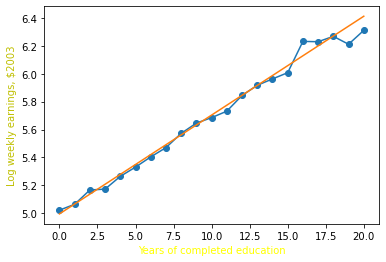

In [19]:
plt.figure()
educ_means.plot(kind="line", x="educ", y="lwklywge", style="-o")
yhat.plot()
plt.xlabel("Years of completed education").set_color('yellow')
plt.ylabel("Log weekly earnings, \\$2003").set_color('y')
plt.legend().set_visible(False)
plt.savefig("Figure 3-1-2-Python.pdf")